## Install Dependencies and Setup

In [132]:
import numpy as np             
import pandas as pd
import tensorflow as tf
import os
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer


In [4]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau

In [13]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## Extract Images from Data path

In [94]:
train_data = "Data//train"
test_data = "Data//test"
val_data = "Data//val"

In [187]:
base_dir = 'Data/'
train_normal = glob(os.path.join(base_dir, "train", "NORMAL", "*.jpeg"))
train_pneumonia = glob(os.path.join(base_dir, "train", "PNEUMONIA", "*.jpeg"))

test_all = glob(os.path.join(base_dir, "test", "*.jpeg"))
test_normal = glob(os.path.join(base_dir, "test", "NORMAL", "*.jpeg"))
test_pneumonia = glob(os.path.join(base_dir, "test", "PNEUMONIA", "*.jpeg"))

val_normal = glob(os.path.join(base_dir, "val", "NORMAL", "*.jpeg"))
val_pneumonia = glob(os.path.join(base_dir, "val", "PNEUMONIA", "*.jpeg"))

In [134]:
df_train = pd.DataFrame({
    'class': ['Normal'] * len(train_normal) + ['Pneumonia'] * len(train_pneumonia),
    'image': train_normal + train_pneumonia
})

df_test = pd.DataFrame({
    'class': ['Normal'] * len(test_normal) + ['Pneumonia'] * len(test_pneumonia),
    'image': test_normal + test_pneumonia
})

df_val = pd.DataFrame({
    'class': ['Normal'] * len(val_normal) + ['Pneumonia'] * len(val_pneumonia),
    'image': val_normal + val_pneumonia
})

In [135]:
df_train

,class,image
0,Normal,Data/train/NORMAL/NORMAL2-IM-0927-0001.jpeg
1,Normal,Data/train/NORMAL/NORMAL2-IM-1056-0001.jpeg
2,Normal,Data/train/NORMAL/IM-0427-0001.jpeg
3,Normal,Data/train/NORMAL/NORMAL2-IM-1260-0001.jpeg
4,Normal,Data/train/NORMAL/IM-0656-0001-0001.jpeg
...,...,...
5211,Pneumonia,Data/train/PNEUMONIA/person142_virus_288.jpeg
5212,Pneumonia,Data/train/PNEUMONIA/person364_bacteria_1659.jpeg
5213,Pneumonia,Data/train/PNEUMONIA/person1323_virus_2283.jpeg
5214,Pneumonia,Data/train/PNEUMONIA/person772_virus_1401.jpeg


In [136]:
df_test

,class,image
0,Normal,Data/test/NORMAL/IM-0031-0001.jpeg
1,Normal,Data/test/NORMAL/IM-0025-0001.jpeg
2,Normal,Data/test/NORMAL/NORMAL2-IM-0272-0001.jpeg
3,Normal,Data/test/NORMAL/NORMAL2-IM-0102-0001.jpeg
4,Normal,Data/test/NORMAL/NORMAL2-IM-0229-0001.jpeg
...,...,...
619,Pneumonia,Data/test/PNEUMONIA/person120_bacteria_572.jpeg
620,Pneumonia,Data/test/PNEUMONIA/person171_bacteria_826.jpeg
621,Pneumonia,Data/test/PNEUMONIA/person109_bacteria_512.jpeg
622,Pneumonia,Data/test/PNEUMONIA/person83_bacteria_410.jpeg


In [137]:
df_train = pd.concat([df_train, df_val], axis=0)

# Reset the index 
df_train = df_train.reset_index(drop=True)

In [138]:
df_train

,class,image
0,Normal,Data/train/NORMAL/NORMAL2-IM-0927-0001.jpeg
1,Normal,Data/train/NORMAL/NORMAL2-IM-1056-0001.jpeg
2,Normal,Data/train/NORMAL/IM-0427-0001.jpeg
3,Normal,Data/train/NORMAL/NORMAL2-IM-1260-0001.jpeg
4,Normal,Data/train/NORMAL/IM-0656-0001-0001.jpeg
...,...,...
5227,Pneumonia,Data/val/PNEUMONIA/person1946_bacteria_4874.jpeg
5228,Pneumonia,Data/val/PNEUMONIA/person1947_bacteria_4876.jpeg
5229,Pneumonia,Data/val/PNEUMONIA/person1946_bacteria_4875.jpeg
5230,Pneumonia,Data/val/PNEUMONIA/person1949_bacteria_4880.jpeg


## Do some EDA

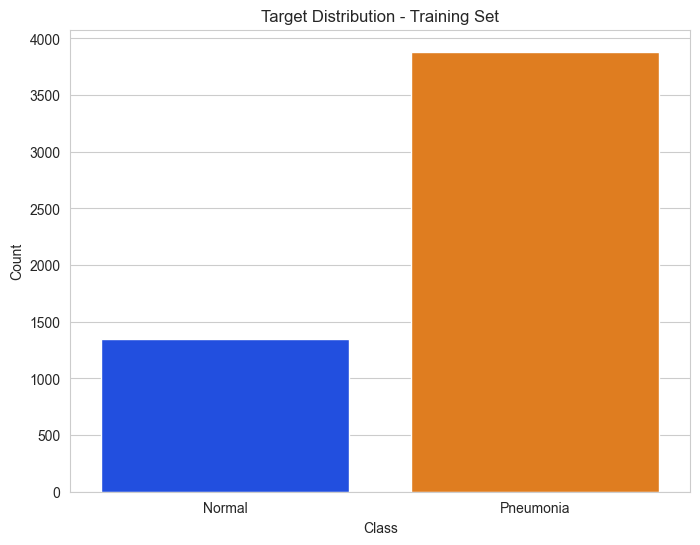

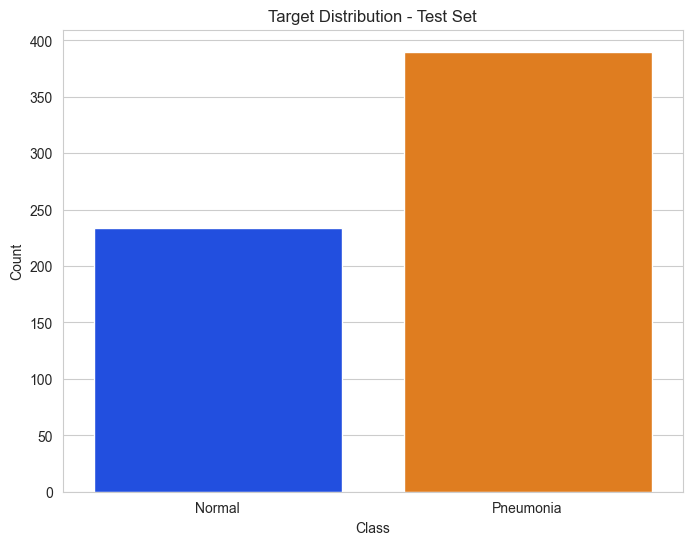

In [169]:
# look at the training set distribution
sns.set_palette("bright")
sns.set_style("whitegrid")

# Plotting target distribution in the training set
plt.figure(figsize=(8, 6))

sns.countplot(data=df_train, x='class')
plt.title('Target Distribution - Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Plotting target distribution in the test set
plt.figure(figsize=(8, 6))
sns.countplot(data=df_test, x='class')
plt.title('Target Distribution - Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

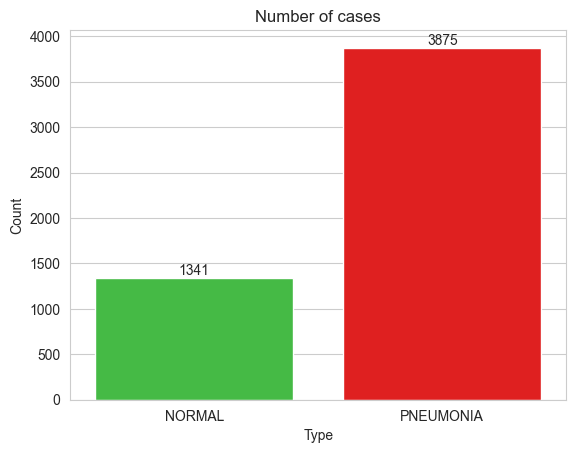

In [249]:
#quantitative visualization of training dataset
colors = ['#32CD32', 'red']
ax = sns.barplot(x=classnames, y=class_counts, palette=colors)

# Adding y-axis reading on the bars for better visualization
for i, v in enumerate(class_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
    
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Number of cases')
plt.show()

<IPython.core.display.Javascript object>

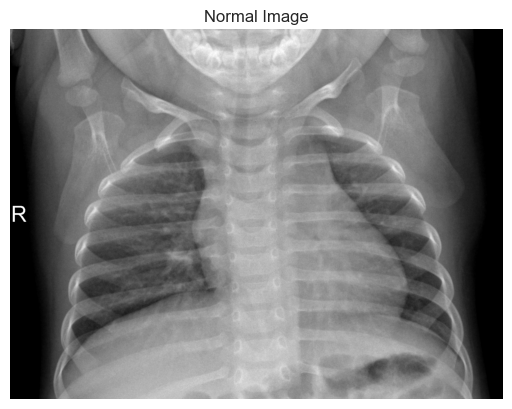

<IPython.core.display.Javascript object>

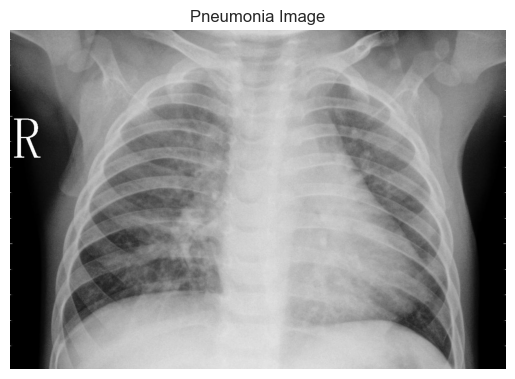

In [142]:
# Open normal and pneumonia image side by side

image_path1 = df_train['image'][1]
try:
    image1 = Image.open(image_path1)
    plt.imshow(image1, cmap='gray')
    plt.title('Normal Image')
    plt.axis('off')
    plt.show()
except (IOError, OSError) as e:
    print(f"Error opening image: {e}")

image_path2 = df_train['image'][5110]
try:
    image2 = Image.open(image_path2)
    plt.imshow(image2, cmap='gray')
    plt.title('Pneumonia Image')
    plt.axis('off')
    plt.show()
except (IOError, OSError) as e:
    print(f"Error opening image: {e}")

In [143]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = 42, stratify = df_train['class'])

In [155]:
def display_image(scan,index):
    #params: takes in index number (int), scan type (string) {'CT', 'X-Ray'}
    # returns: shows images from each type of scan and the class it belongs too 
    
    image_list = []
    image1 = 'Data/train/{}/{}'.format(scan,
                                    os.listdir('Data/train/{}'.format(scan))[index])
    image2 = 'Data/test/{}/{}'.format(scan,
                                    os.listdir('Data/test/{}'.format(scan))[index])
    

    image_list.extend([image1,image2])
    for x in image_list:  
        plt.figure()
        plt.imshow(tf.keras.utils.load_img(x, target_size=(350, 750)))

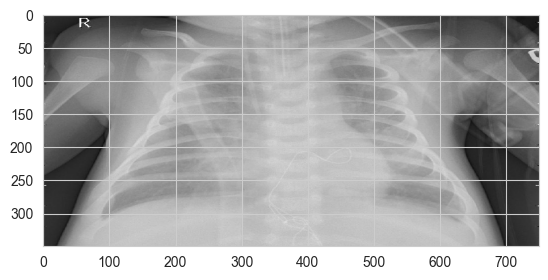

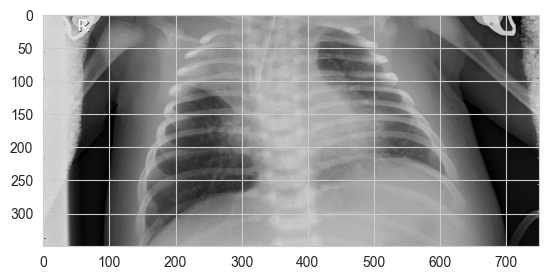

In [156]:
display_image("PNEUMONIA", 2)

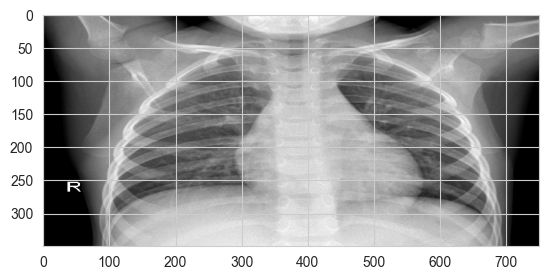

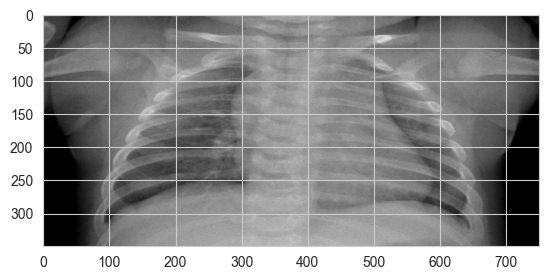

In [157]:
display_image("NORMAL", 2)

In [144]:
train_df

,class,image
3558,Pneumonia,Data/train/PNEUMONIA/person1313_bacteria_3320....
2858,Pneumonia,Data/train/PNEUMONIA/person372_bacteria_1705.jpeg
2673,Pneumonia,Data/train/PNEUMONIA/person73_bacteria_358.jpeg
1199,Normal,Data/train/NORMAL/NORMAL2-IM-1094-0001-0001.jpeg
4611,Pneumonia,Data/train/PNEUMONIA/person968_bacteria_2893.jpeg
...,...,...
3468,Pneumonia,Data/train/PNEUMONIA/person1175_bacteria_3122....
678,Normal,Data/train/NORMAL/NORMAL2-IM-1257-0001.jpeg
1552,Pneumonia,Data/train/PNEUMONIA/person610_bacteria_2475.jpeg
2761,Pneumonia,Data/train/PNEUMONIA/person1161_virus_1948.jpeg


In [145]:
val_df

,class,image
2937,Pneumonia,Data/train/PNEUMONIA/person55_bacteria_262.jpeg
4870,Pneumonia,Data/train/PNEUMONIA/person1527_bacteria_3989....
3169,Pneumonia,Data/train/PNEUMONIA/person500_virus_1009.jpeg
972,Normal,Data/train/NORMAL/IM-0182-0001.jpeg
3051,Pneumonia,Data/train/PNEUMONIA/person1038_virus_1733.jpeg
...,...,...
253,Normal,Data/train/NORMAL/NORMAL2-IM-0478-0001.jpeg
4307,Pneumonia,Data/train/PNEUMONIA/person1312_bacteria_3313....
687,Normal,Data/train/NORMAL/NORMAL2-IM-1419-0001.jpeg
3409,Pneumonia,Data/train/PNEUMONIA/person823_virus_1459.jpeg


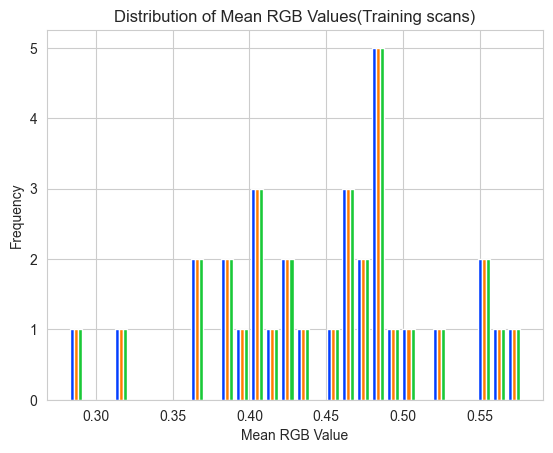

In [160]:
# evaluating RGB values per image 

images, labels = ds_train.next()
images = np.reshape(images, (images.shape[0], images.shape[1], images.shape[2], 3))
mean_rgb = np.mean(images, axis=(1, 2))

plt.hist(mean_rgb, bins=30)
plt.title('Distribution of Mean RGB Values(Training scans)')
plt.xlabel('Mean RGB Value')
plt.ylabel('Frequency')
plt.show()

In [146]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale pixel values

# Create data generators
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='class',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=32
)

ds_val = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image',
    y_col='class',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=32
)

ds_test = val_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image',
    y_col='class',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=1
)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


## MODEL 1

In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
    model.add(Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
    model.add(Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
    model.add(Conv2D(128, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
    model.add(Conv2D(256, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    
    return model
    

In [148]:
model = create_model()

In [149]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=3e-5),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 109, 109, 64)      0         
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      2

In [150]:
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau

# Create the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-7,restore_best_weights=True)
plateau = ReduceLROnPlateau(monitor='val_loss',factor = 0.2,patience = 2,min_delt = 1e-7,cooldown = 0,verbose = 1) 

In [151]:
history = model.fit(ds_train,
                    batch_size = 32,
                    epochs = 50,
                    validation_data=ds_val,
                    callbacks=[early_stopping, plateau],
                    steps_per_epoch=(len(train_df)/32),
                    validation_steps=(len(val_df)/32));

Epoch 1/50
130/130 [==============================] - 105s 799ms/step - loss: 0.3460 - binary_accuracy: 0.8437 - val_loss: 0.9463 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 2/50
130/130 [==============================] - 111s 844ms/step - loss: 0.2414 - binary_accuracy: 0.8982 - val_loss: 1.4884 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 3/50
131/130 [==============================] - ETA: 0s - loss: 0.2087 - binary_accuracy: 0.9123
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 114s 867ms/step - loss: 0.2087 - binary_accuracy: 0.9123 - val_loss: 1.5457 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 4/50
130/130 [==============================] - 121s 923ms/step - loss: 0.1986 - binary_accuracy: 0.9233 - val_loss: 0.7905 - val_binary_accuracy: 0.7431 - lr: 6.0000e-06
Epoch 5/50
130/130 [==============================] - 128s 976ms/step - loss: 0.1790 - binary_accuracy: 0.9290 - val_loss: 

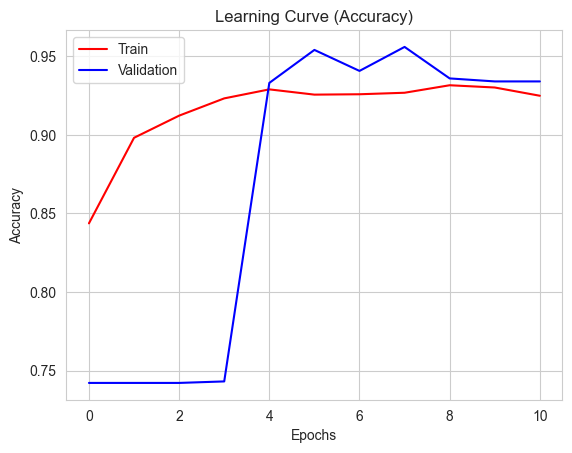

In [152]:
# make a learning curve for the accuracy of the model 
plt.plot(history.history['binary_accuracy'], color='red', label='Train')
plt.plot(history.history['val_binary_accuracy'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Accuracy)')
plt.show()

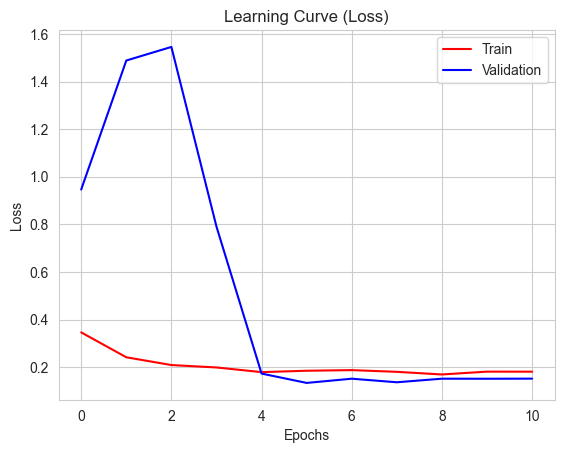

In [153]:
# make learning curve for the loss of learning in the model
plt.plot(history.history['loss'], color='red', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve (Loss)')
plt.show()

In [154]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(ds_val,steps = int(len(ds_val)/32), verbose = 0)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(ds_test,steps = len(ds_test), verbose = 0)

# Get the predicted labels and true labels for the test dataset
test_labels = ds_test.labels
predicted_labels = model.predict(ds_test)

# Flatten the predicted labels to a 1D array
predicted_labels = np.round(predicted_labels).flatten()

# Calculate evaluation metrics
cm = confusion_matrix(test_labels, predicted_labels)
classification_rep = classification_report(test_labels, predicted_labels)

# Print the evaluation metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_rep)

624/624 [==============================] - 6s 10ms/step
Validation Loss: 0.07717286050319672
Validation Accuracy: 0.96875
Test Loss: 0.41904592514038086
Test Accuracy: 0.8349359035491943
Confusion Matrix:
[[ 51 183]
 [ 86 304]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.22      0.27       234
           1       0.62      0.78      0.69       390

    accuracy                           0.57       624
   macro avg       0.50      0.50      0.48       624
weighted avg       0.53      0.57      0.54       624



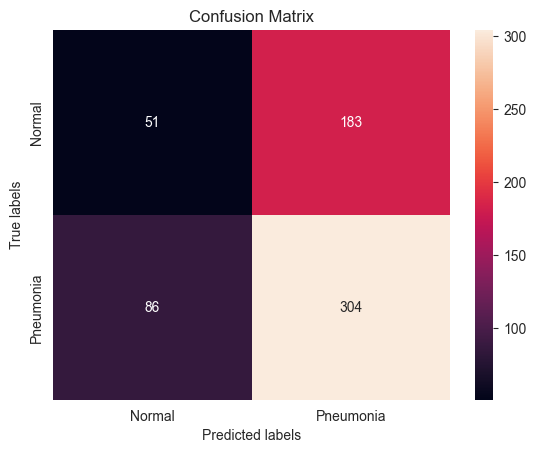

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Normal", 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia']);

In [197]:
classnames = list(train_data.class_indices.keys())
print("classnames : ", classnames)

# Get the number of images in the train data
tr_count = train_data.n
print("Number of Images : ", tr_count)

#retrieving the image width, height and number of channels respectively
img_width, img_height, channels = train_data.image_shape
print(f"width : {img_width} \nheight :  {img_height} \nchannels : {channels}")

#copying
i_width,i_height,i_channels = img_width,img_height,channels

#retrieving number of classes
classes_count=train_data.num_classes
print("number of classes : ",classes_count)

class_labels = train_data.classes
print("Class labels:", class_labels)

#count number of samples in each class
class_counts = np.bincount(class_labels)
for class_name, num_samples in zip(classnames, class_counts):
    print(f"{class_name}: {num_samples}")

classnames :  ['NORMAL', 'PNEUMONIA']
Number of Images :  5216
width : 224 
height :  224 
channels : 3
number of classes :  2
Class labels: [0 0 0 ... 1 1 1]
NORMAL: 1341
PNEUMONIA: 3875


In [200]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(ds_test)
print("Loss :","{:.2f}%".format(test_loss*100))
print("Accuracy :", "{:.2f}%".format(test_accuracy*100))

624/624 [==============================] - 6s 9ms/step - loss: 0.4190 - binary_accuracy: 0.8349
Loss : 41.90%
Accuracy : 83.49%


## Model 2

In [230]:
#create second model
model_2 = models.Sequential()
    
model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
model_2.add(Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
model_2.add(Conv2D(128, (3, 3), strides=1, padding='valid', activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
model_2.add(Conv2D(256, (3, 3), strides=1, padding='valid', activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
model_2.add(Flatten())
model_2.add(Dense(units=256, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=1, activation='sigmoid'))

In [256]:
model_2 = create_model()

In [257]:
from keras import optimizers

model_2.compile(loss='binary_crossentropy',
                metrics='binary_accuracy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4))
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_18 (Ba  (None, 222, 222, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 dropout_17 (Dropout)        (None, 109, 109, 64)      0         
                                                                 
 batch_normalization_19 (Ba  (None, 109, 109, 64)    

In [258]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-7,restore_best_weights=True)
plateau = ReduceLROnPlateau(monitor='val_loss',factor = 0.2,patience = 2,min_delt = 1e-7,cooldown = 0,verbose = 1) 

In [259]:
history_2 = model_2.fit(ds_train,
                    batch_size = 32,
                    epochs = 50,
                    validation_data=ds_val,
                    callbacks=[early_stopping, plateau],
                    steps_per_epoch=(len(train_df)/32),
                    validation_steps=(len(val_df)/32));

Epoch 1/50
130/130 [==============================] - 113s 852ms/step - loss: 0.2981 - binary_accuracy: 0.8786 - val_loss: 1.3035 - val_binary_accuracy: 0.7421 - lr: 1.0000e-04
Epoch 2/50
130/130 [==============================] - 127s 973ms/step - loss: 0.2302 - binary_accuracy: 0.9082 - val_loss: 3.2703 - val_binary_accuracy: 0.7421 - lr: 1.0000e-04
Epoch 3/50
131/130 [==============================] - ETA: 0s - loss: 0.2056 - binary_accuracy: 0.9207
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
130/130 [==============================] - 120s 916ms/step - loss: 0.2056 - binary_accuracy: 0.9207 - val_loss: 2.6865 - val_binary_accuracy: 0.7421 - lr: 1.0000e-04
Epoch 4/50
130/130 [==============================] - 127s 964ms/step - loss: 0.1682 - binary_accuracy: 0.9393 - val_loss: 0.5583 - val_binary_accuracy: 0.8147 - lr: 2.0000e-05
Epoch 5/50
130/130 [==============================] - 158s 1s/step - loss: 0.1602 - binary_accuracy: 0.9376 - val_loss: 0.1

In [260]:
# Evaluate the model on test data
test_loss, test_accuracy = model_2.evaluate(ds_test)
print("Loss :","{:.2f}%".format(test_loss*100))
print("Accuracy :", "{:.2f}%".format(test_accuracy*100))

624/624 [==============================] - 7s 11ms/step - loss: 0.5930 - binary_accuracy: 0.8269
Loss : 59.30%
Accuracy : 82.69%


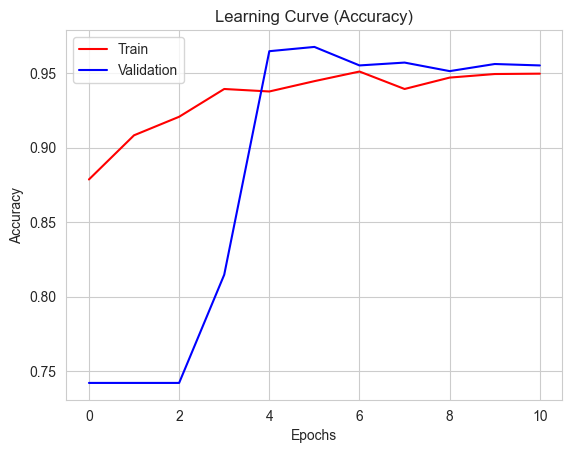

In [261]:
plt.plot(history_2.history['binary_accuracy'], color='red', label='Train')
plt.plot(history_2.history['val_binary_accuracy'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Accuracy) for Model 2')
plt.show()

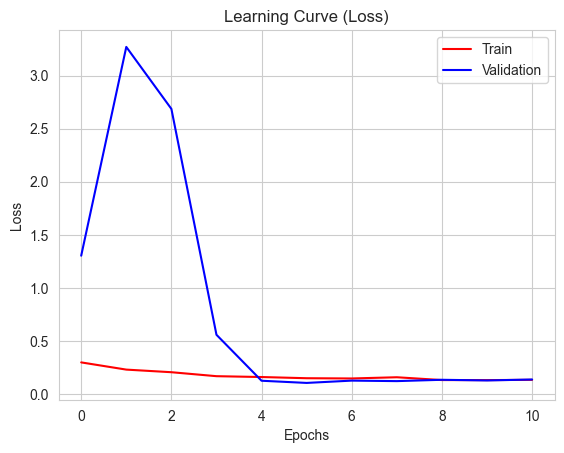

In [262]:
plt.plot(history_2.history['loss'], color='red', label='Train')
plt.plot(history_2.history['val_loss'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve (Loss) for model 2')
plt.show()

In [263]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model_2.evaluate(ds_val,steps = int(len(ds_val)/32), verbose = 0)
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_2.evaluate(ds_test,steps = len(ds_test), verbose = 0)

# Get the predicted labels and true labels for the test dataset
test_labels_2 = ds_test.labels
predicted_labels_2 = model_2.predict(ds_test)

# Flatten the predicted labels to a 1D array
predicted_labels_2 = np.round(predicted_labels_2).flatten()

# Calculate evaluation metrics
cm_2 = confusion_matrix(test_labels_2, predicted_labels_2)
classification_rep = classification_report(test_labels_2, predicted_labels_2)

# Print the evaluation metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(cm_2)
print("Classification Report:")
print(classification_rep)

624/624 [==============================] - 7s 11ms/step
Validation Loss: 0.10974495857954025
Validation Accuracy: 0.96875
Test Loss: 0.5929654240608215
Test Accuracy: 0.8269230723381042
Confusion Matrix:
[[ 50 184]
 [ 82 308]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.21      0.27       234
           1       0.63      0.79      0.70       390

    accuracy                           0.57       624
   macro avg       0.50      0.50      0.49       624
weighted avg       0.53      0.57      0.54       624



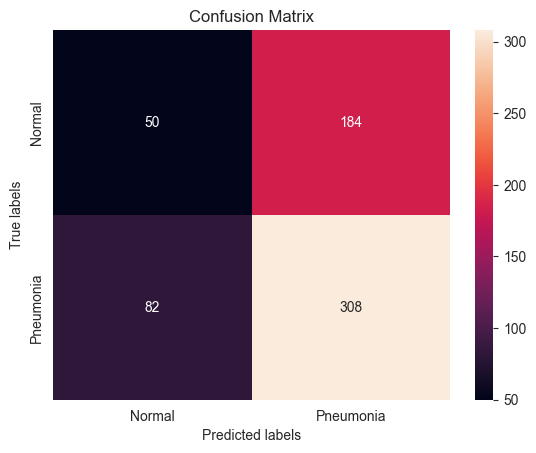

In [264]:
ax= plt.subplot()
sns.heatmap(cm_2, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Normal", 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia']);

## Model 3

In [255]:
# no batch normalization and less layers (only 1 layer)
model_3 = models.Sequential()
    
model_3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_3.add(MaxPooling2D((3, 3), strides=1, padding='valid'))
    
model_3.add(Flatten())

model_3.add(Dense(units=256, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(units=1, activation='sigmoid'))

In [265]:
model_3 = create_model()

In [266]:
model_3.compile(loss='binary_crossentropy',
                metrics='binary_accuracy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4))
model_3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_23 (Ba  (None, 222, 222, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 dropout_22 (Dropout)        (None, 109, 109, 64)      0         
                                                                 
 batch_normalization_24 (Ba  (None, 109, 109, 64)    

In [267]:
history_3 = model_3.fit(ds_train,
                    batch_size = 32,
                    epochs = 50,
                    validation_data=ds_val,
                    callbacks=[early_stopping, plateau],
                    steps_per_epoch=(len(train_df)/32),
                    validation_steps=(len(val_df)/32));

Epoch 1/50
130/130 [==============================] - 136s 1s/step - loss: 0.3185 - binary_accuracy: 0.8724 - val_loss: 1.1868 - val_binary_accuracy: 0.7421 - lr: 1.0000e-04
Epoch 2/50
130/130 [==============================] - 130s 991ms/step - loss: 0.2234 - binary_accuracy: 0.9104 - val_loss: 2.9208 - val_binary_accuracy: 0.7421 - lr: 1.0000e-04
Epoch 3/50
131/130 [==============================] - ETA: 0s - loss: 0.2006 - binary_accuracy: 0.9207
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
130/130 [==============================] - 128s 974ms/step - loss: 0.2006 - binary_accuracy: 0.9207 - val_loss: 2.4273 - val_binary_accuracy: 0.7421 - lr: 1.0000e-04
Epoch 4/50
130/130 [==============================] - 126s 961ms/step - loss: 0.1670 - binary_accuracy: 0.9343 - val_loss: 1.1047 - val_binary_accuracy: 0.7526 - lr: 2.0000e-05
Epoch 5/50
130/130 [==============================] - 126s 963ms/step - loss: 0.1595 - binary_accuracy: 0.9362 - val_loss: 0.1

In [269]:
# Evaluate the model on test data
test_loss, test_accuracy = model_3.evaluate(ds_test)
print("Loss :","{:.2f}%".format(test_loss*100))
print("Accuracy :", "{:.2f}%".format(test_accuracy*100))

624/624 [==============================] - 7s 11ms/step - loss: 0.8684 - binary_accuracy: 0.8077
Loss : 86.84%
Accuracy : 80.77%


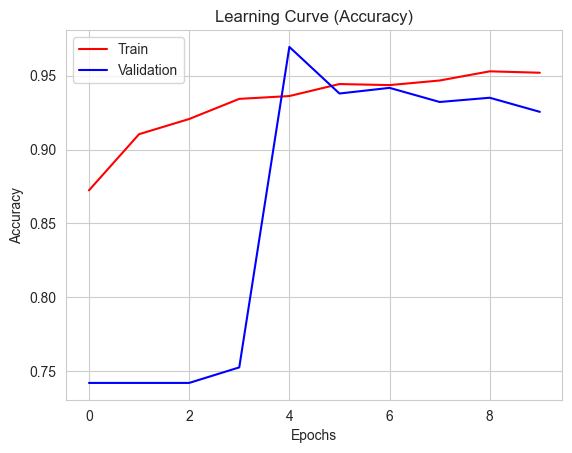

In [270]:
plt.plot(history_3.history['binary_accuracy'], color='red', label='Train')
plt.plot(history_3.history['val_binary_accuracy'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Accuracy)')
plt.show()

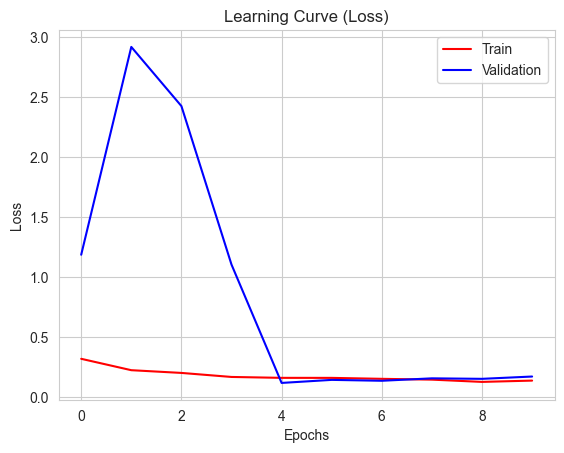

In [271]:
plt.plot(history_3.history['loss'], color='red', label='Train')
plt.plot(history_3.history['val_loss'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve (Loss)')
plt.show()

In [275]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model_3.evaluate(ds_val,steps = int(len(ds_val)/32), verbose = 0)
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_3.evaluate(ds_test,steps = len(ds_test), verbose = 0)

# Get the predicted labels and true labels for the test dataset
test_labels_3 = ds_test.labels
predicted_labels_3 = model_3.predict(ds_test)

# Flatten the predicted labels to a 1D array
predicted_labels_3 = np.round(predicted_labels_3).flatten()

# Calculate evaluation metrics
cm_3 = confusion_matrix(test_labels_3, predicted_labels_3)
classification_rep = classification_report(test_labels_3, predicted_labels_3)

# Print the evaluation metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(cm_3)
print("Classification Report:")
print(classification_rep)

624/624 [==============================] - 6s 9ms/step
Validation Loss: 0.06855463981628418
Validation Accuracy: 0.96875
Test Loss: 0.8684326410293579
Test Accuracy: 0.807692289352417
Confusion Matrix:
[[ 54 180]
 [ 64 326]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.23      0.31       234
           1       0.64      0.84      0.73       390

    accuracy                           0.61       624
   macro avg       0.55      0.53      0.52       624
weighted avg       0.57      0.61      0.57       624



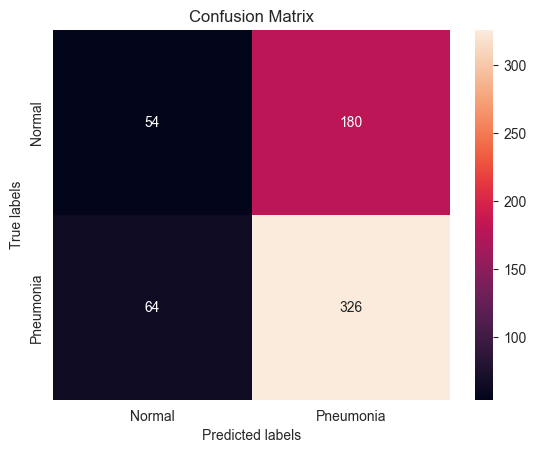

In [276]:
ax= plt.subplot()
sns.heatmap(cm_3, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Normal", 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia']);

## Model 4

In [312]:
model_4 = models.Sequential()
    
model_4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
model_4.add(Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
model_4.add(Conv2D(128, (3, 3), strides=1, padding='valid', activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
  
model_4.add(Flatten())
model_4.add(Dense(units=256, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(units=1, activation='sigmoid'))

In [313]:
model_4 = create_model()

In [354]:
model_4.compile(loss='binary_crossentropy',
                metrics= ['binary_accuracy',
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')],
                optimizer= "adam")
model_4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_31 (Ba  (None, 222, 222, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 dropout_29 (Dropout)        (None, 109, 109, 64)      0         
                                                                 
 batch_normalization_32 (Ba  (None, 109, 109, 64)    

In [375]:
history_4 = model_3.fit(ds_train,
                    batch_size = 32,
                    epochs = 100,
                    validation_data=ds_val,
                    callbacks=[early_stopping, plateau],
                    steps_per_epoch=(len(train_df)/32),
                    validation_steps=(len(val_df)/32));

Epoch 1/100
130/130 [==============================] - 122s 934ms/step - loss: 0.1600 - binary_accuracy: 0.9410 - val_loss: 0.1233 - val_binary_accuracy: 0.9532 - lr: 8.0000e-07
Epoch 2/100
130/130 [==============================] - 118s 897ms/step - loss: 0.1474 - binary_accuracy: 0.9448 - val_loss: 0.1506 - val_binary_accuracy: 0.9331 - lr: 8.0000e-07
Epoch 3/100
131/130 [==============================] - ETA: 0s - loss: 0.1550 - binary_accuracy: 0.9405
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.600000018697756e-07.
130/130 [==============================] - 111s 843ms/step - loss: 0.1550 - binary_accuracy: 0.9405 - val_loss: 0.1631 - val_binary_accuracy: 0.9255 - lr: 8.0000e-07
Epoch 4/100
130/130 [==============================] - 131s 998ms/step - loss: 0.1508 - binary_accuracy: 0.9424 - val_loss: 0.1717 - val_binary_accuracy: 0.9226 - lr: 1.6000e-07
Epoch 5/100
131/130 [==============================] - ETA: 0s - loss: 0.1462 - binary_accuracy: 0.9427
Epoch 5: ReduceL

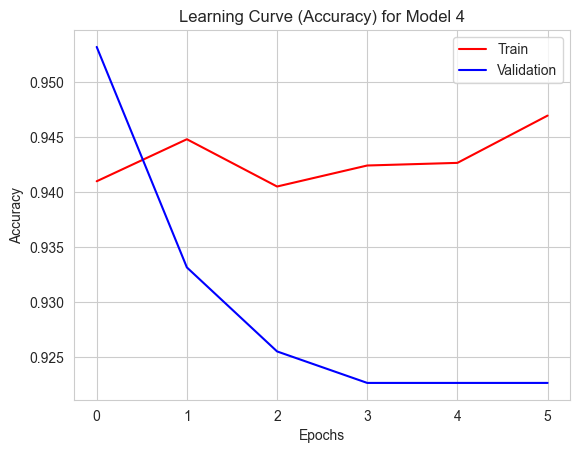

In [376]:
plt.plot(history_4.history['binary_accuracy'], color='red', label='Train')
plt.plot(history_4.history['val_binary_accuracy'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Accuracy) for Model 4')
plt.show()

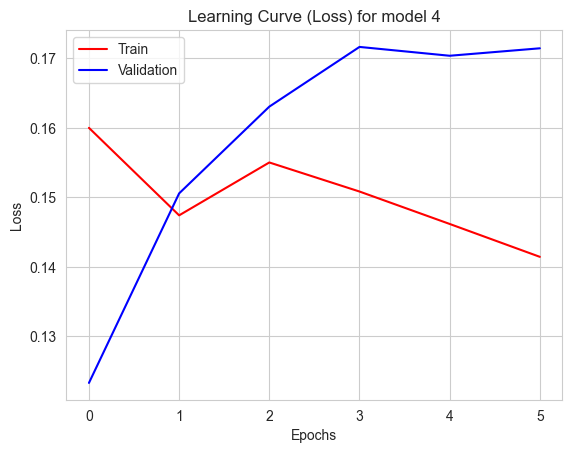

In [377]:
plt.plot(history_4.history['loss'], color='red', label='Train')
plt.plot(history_4.history['val_loss'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve (Loss) for model 4')
plt.show()

In [378]:
# Evaluate the model on the validation dataset
val_accuracy = model_4.evaluate(ds_val,steps = int(len(ds_val)/32), verbose = 0)
# Evaluate the model on the test dataset
test_accuracy = model_4.evaluate(ds_test,steps = len(ds_test), verbose = 0)

# Get the predicted labels and true labels for the test dataset
test_labels_4 = ds_test.labels
predicted_labels_4 = model_4.predict(ds_test)

# Flatten the predicted labels to a 1D array
predicted_labels_4 = np.round(predicted_labels_4).flatten()

# Calculate evaluation metrics
cm_4 = confusion_matrix(test_labels_4, predicted_labels_4)
classification_rep = classification_report(test_labels_4, predicted_labels_4)

# Print the evaluation metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(cm_4)
print("Classification Report:")
print(classification_rep)

624/624 [==============================] - 6s 10ms/step
Validation Loss: 0.1113496720790863
Validation Accuracy: [0.06009572744369507, 0.96875, 0.9615384340286255, 1.0]
Test Loss: 0.6239380836486816
Test Accuracy: [1.642516851425171, 0.7900640964508057, 0.7495182752609253, 0.9974358677864075]
Confusion Matrix:
[[ 39 195]
 [ 66 324]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.17      0.23       234
           1       0.62      0.83      0.71       390

    accuracy                           0.58       624
   macro avg       0.50      0.50      0.47       624
weighted avg       0.53      0.58      0.53       624



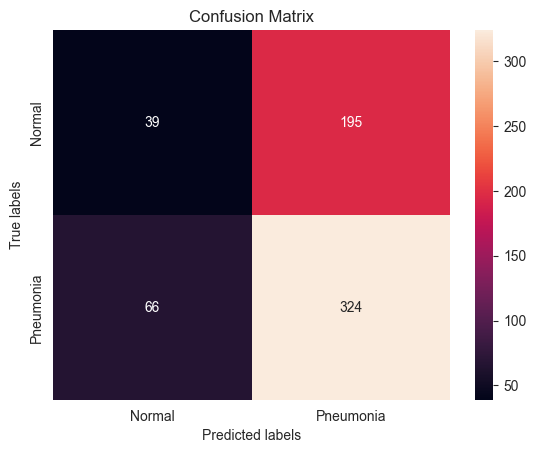

In [379]:
ax= plt.subplot()
sns.heatmap(cm_4, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Normal", 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia']);

## Test the predictions on validation set to see if it predicts accurately

In [278]:
import cv2

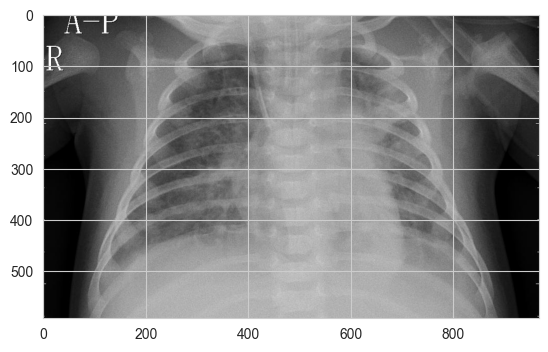

In [306]:
img = cv2.imread('Data/val/PNEUMONIA/person1946_bacteria_4874.jpeg')
plt.imshow(img)
plt.show()

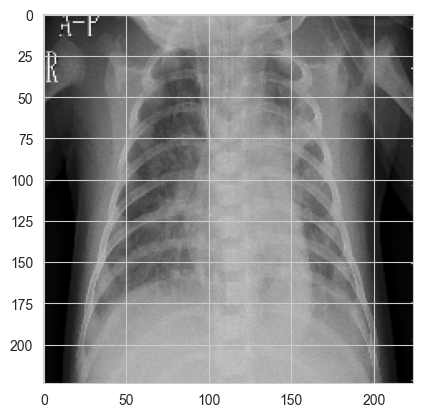

In [307]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [308]:
resize

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 15.660714 ,  15.660714 ,  15.660714 ],
        [ 18.982143 ,  18.982143 ,  18.982143 ],
        [ 20.       ,  20.       ,  20.       ],
        ...,
        [ 13.       ,  13.       ,  13.       ],
        [ 11.011497 ,  11.011497 ,  11.011497 ],
        [ 11.403687 ,  11.403687 ,  11.403687 ]],

       [[ 15.660714 ,  15.660714 ,  15.660714 ],
        [ 18.982143 ,  18.982143 ,  18.982143 ],
        [ 18.303572 ,  18.303572 ,  18.303572 ],
        ...,
        [ 17.553616 ,  17.553616 ,  17.553616 ],
        [ 19.866722 ,  19.866722 ,  19.866722 ],
        [ 18.842442 ,  18.842442 ,  18.842442 ]],

       [[ 15.660714 ,  15.660714 ,  15.660714 ],
        [ 18.982143 ,  18.982143 ,  18.982143 ],
        [ 20.410713 ,  20.410713 ,  20.410713 ],
        ...,
        [ 23.868483 ,  23.868483 ,  23.868483 ],
        [ 18.678574 ,  18.678574 ,  18.678574 ],
        [ 15.589862 ,  15.589862 ,  15.589862 ]],

       ...,

     

In [322]:
yhat = model_3.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 219ms/step


In [323]:
yhat

array([[0.9996994]], dtype=float32)

In [324]:
if yhat > 0.5: 
    print(f'Predicted class is Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class is Pneumonia


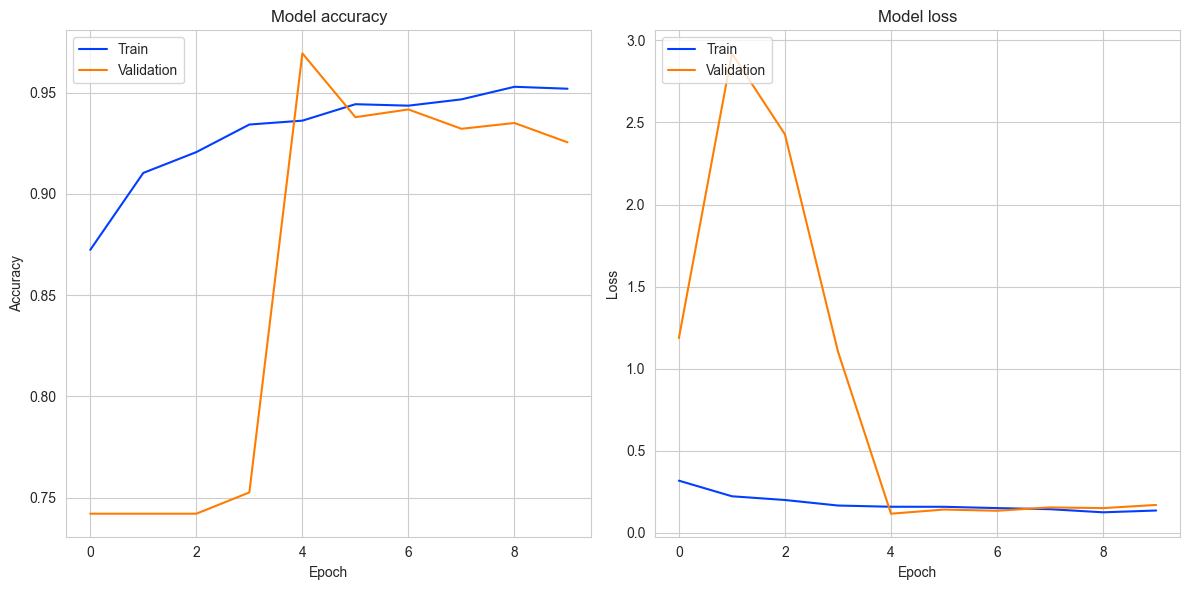

In [381]:
#Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_3.history["binary_accuracy"])
plt.plot(history_3.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [382]:
model_3.save("model_3.h5")

/opt/homebrew/Caskroom/miniforge/base/envs/mlenv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
